## Read files using non-ocr (pymupdf or fitz package) and QA-QC

The code below reads the pdf using pymupdf or fitz package and highlights the text boxes with the order listed on them. The text is extracted starting from lowest order text box to the highest order text box.

In [2]:
import os
import sys
current_dir = os.getcwd()
kit_dir = os.path.abspath(os.path.join(current_dir, ".."))
repo_dir = os.path.abspath(os.path.join(kit_dir, ".."))

sys.path.append(kit_dir)
sys.path.append(repo_dir)

import fitz
import glob
import matplotlib.pyplot as plt
import numpy as np

from src.multi_column import column_boxes

In [5]:
# Document loader: Just executes the notebook on a sinle sample file 
folder_loc = os.path.join(kit_dir,'data/sample_data/sample_pdfs')
pdf_files = [f for f in glob.glob(f'{folder_loc}/*.pdf')]
sample_pdf = pdf_files[0]

In [6]:
def show_image(pix, ax=None):
    """Display a pixmap using matplotlib and numpy."""
    img = np.ndarray((pix.h, pix.w, 3), dtype=np.uint8, buffer=pix.samples_mv)  # raw image to numpy array
    plt.figure(dpi=150)
    image = ax.imshow(img)  # let matplotlib show the image
    return image

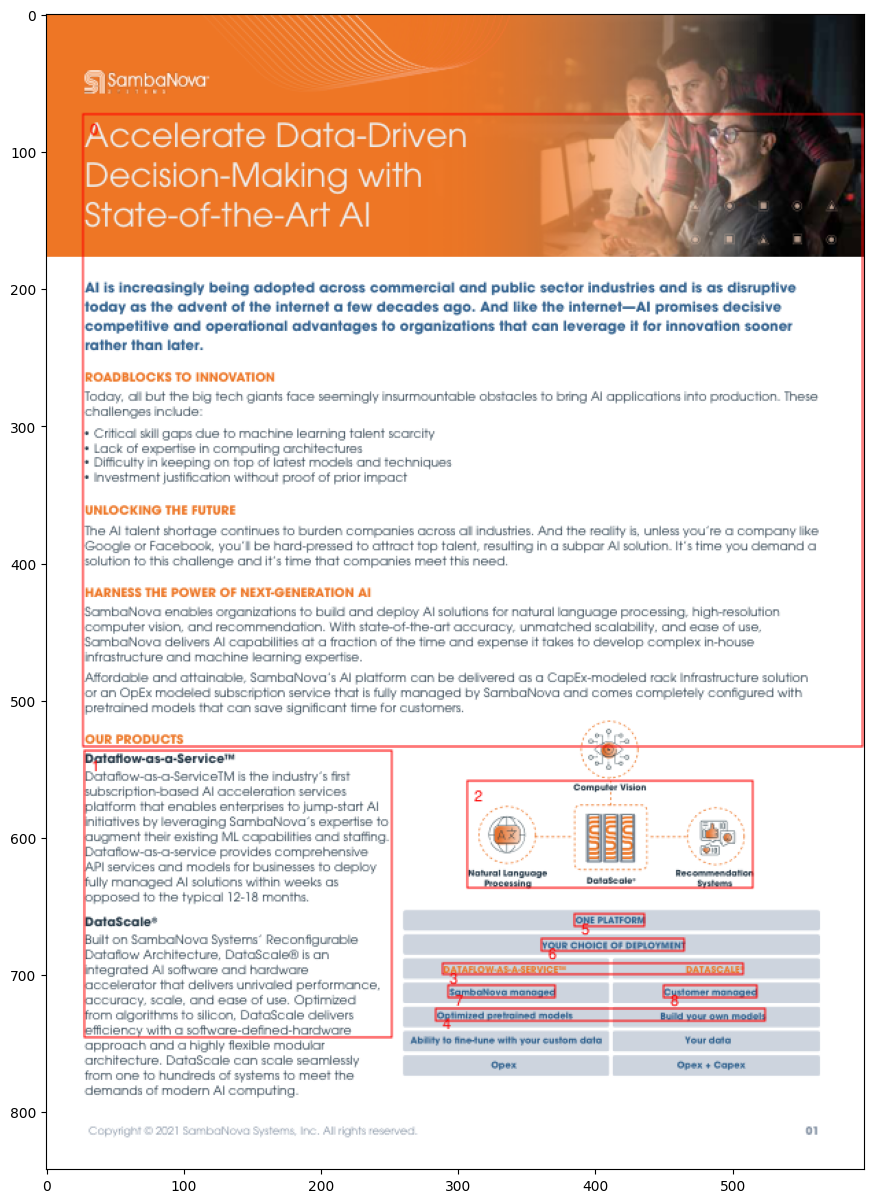

<Figure size 960x720 with 0 Axes>

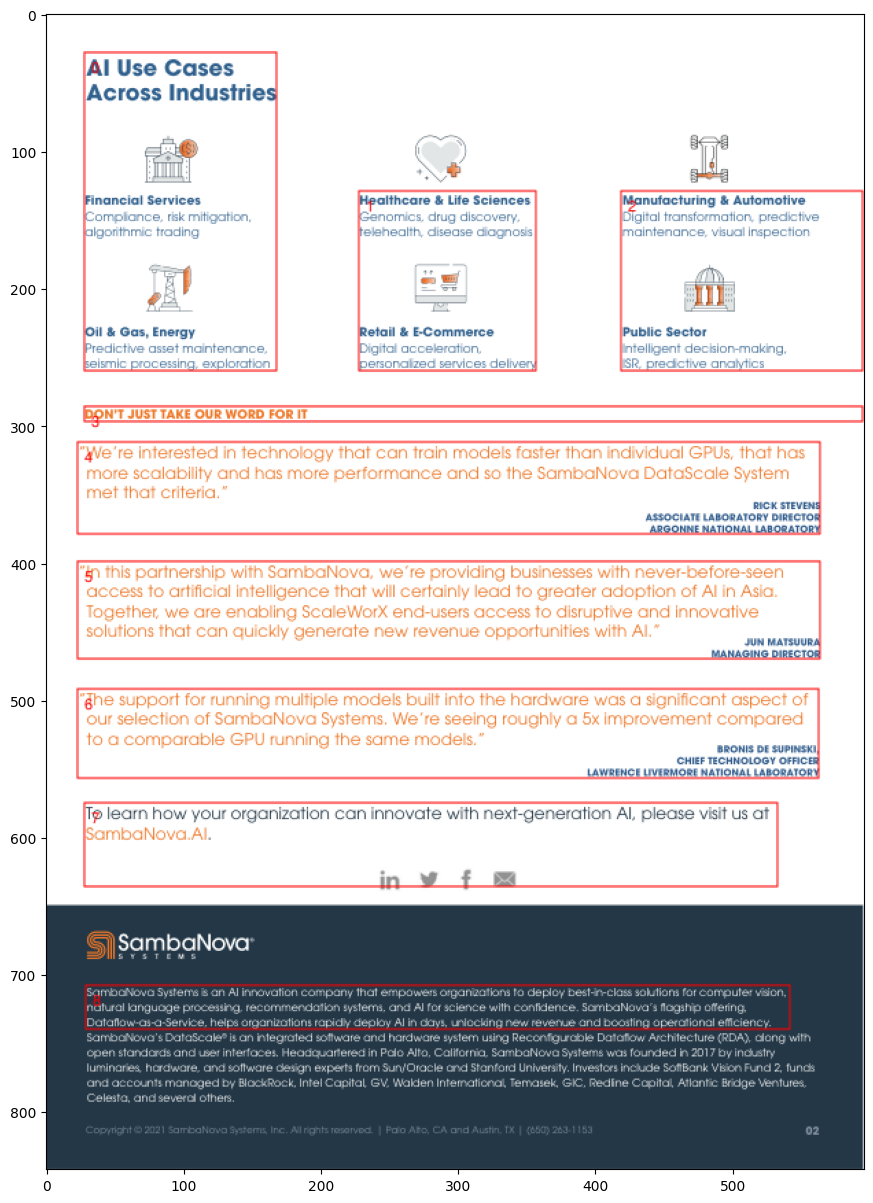

<Figure size 960x720 with 0 Axes>

In [7]:
# Read the pages and plot them with detected text boxes

doc = fitz.open(sample_pdf)

for page in doc:
    bboxes = column_boxes(page, footer_margin=100, no_image_text=True)
    
    shape = page.new_shape()
    for i, rect in enumerate(bboxes):
        shape.draw_rect(rect)  # draw a border

        # write sequence number
        shape.insert_text(rect.tl + (5, 15), str(i), color=fitz.pdfcolor["red"])
    
    # finish drawing / text with color red
    shape.finish(color=fitz.pdfcolor["red"])
    shape.commit() 
    pix = page.get_pixmap()

    fig,ax = plt.subplots(figsize = (20,15))
    _ = show_image(pix, ax)
